In [41]:
import pickle
from collections import OrderedDict

%matplotlib inline

In [42]:
with open("out/w2_wikispeedia-experiments.p", "rb") as f:
    results = pickle.load(f)

{'meta': {'ks': [0,
   0.001,
   0.003,
   0.01,
   0.03,
   0.1,
   0.3,
   1,
   3,
   10,
   30,
   100,
   300,
   1000,
   3000,
   10000,
   30000,
   100000,
   300000,
   1000000,
   3000000,
   10000000,
   30000000,
   100000000]},
 'results': OrderedDict([('links',
               [-907229.94652466709,
                -907227.90794341371,
                -907223.8312145127,
                -907209.56721087091,
                -907168.85172978544,
                -907026.794289905,
                -906624.60396703775,
                -905255.73268152017,
                -901611.48235851259,
                -890858.92960828729,
                -868535.19319516281,
                -822891.36677608336,
                -760183.51420696639,
                -676667.67726397142,
                -604511.32757558674,
                -551697.75333675742,
                -530453.94314622879,
                -524179.20257234573,
                -524702.43531036377,
                -527552

In [43]:
ks = results["meta"]["ks"]
exp = OrderedDict()

for key, value in results["results"].items():
    exp[key] = {"x": ks, "y": value}

In [124]:
import matplotlib

# define styles

def cmap(i):
    a = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
    return a[(i) % len(a)]

import brewer2mpl
linestyles = ['-', '--', ':', "-."]
colors = brewer2mpl.get_map("Set2", "Qualitative", 5)
def cmap(i):
    a = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
    return colors.hex_colors[i % 5]

linewidth=2.5
style = {
    "links": {
        "label": "link", 
        "color": cmap(0), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "linestyle": "--",
        "linewidth": linewidth},
    "cos": {
        "label": "sim", 
        "color": cmap(1), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[1], 
        "linestyle": "--",
        "linewidth": linewidth},
    "deg": {
        "label": "deg",
        "color": cmap(2), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[6], 
        "linestyle": "--",
        "linewidth": linewidth},
    "cos_deg_at2": {
        "label": "sim,deg",
        "color": cmap(3), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[7], 
        "linestyle": "-",
        "linewidth": linewidth},
    "deg_cos_at2": {
        "label": "deg,sim", 
        "color":  cmap(4), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[8], 
        "linestyle": "-",
        "zorder": 20,
        "linewidth": linewidth},
    "deg_cos_at1": {
        "label": "deg,sim @1", 
        "color":  cmap(1), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[1], 
        "linestyle": "-.",
        "zorder": 18,
        "linewidth": linewidth},
    "deg_cos_at3": {
        "label": "deg,sim @3", 
        "color":  cmap(2), 
        "marker": matplotlib.markers.MarkerStyle.filled_markers[0], 
        "linestyle": "--",
        "zorder": 16,
        "linewidth": linewidth},
}

size = (6,2.8)

/media/data/content/systems/linux/home/.virtualenvs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


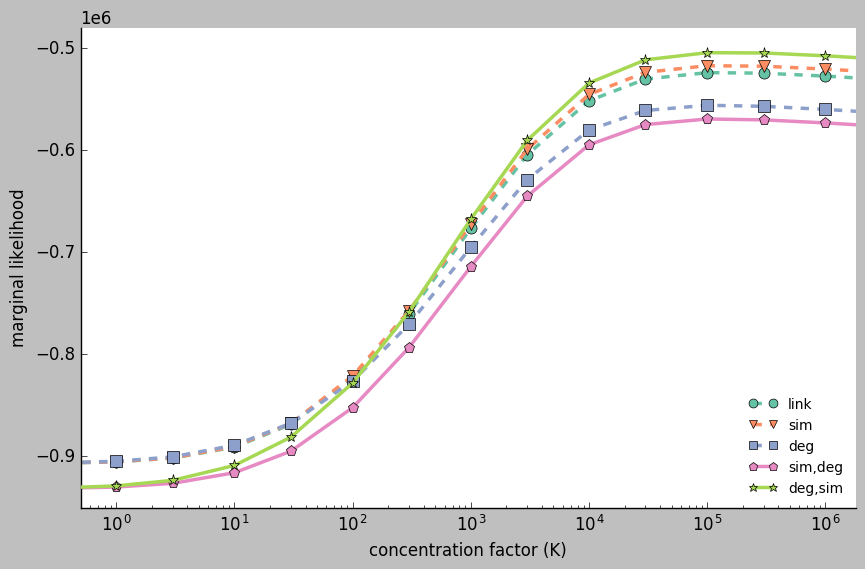

In [125]:
import trails.plot as pl

keys=[
    "links", 
    "cos", 
    "deg", 
    "cos_deg_at2",
    "deg_cos_at2", 
#     "cos_cos_at2", 
#     "deg_deg_at2",
]

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], xlim=[0.5,1800000], 
        notebook=False, size=size, axis_labels=True, leg=False, leg_size=(1,2.8), leg_loc="lower right", leg_anchor=(1, 0))
fig.savefig("out/wiki-links.eps", bbox_inches='tight')
leg.savefig("out/wiki-legend.eps", bbox_inches='tight')

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], xlim=[0.5,1800000], 
        notebook=True, leg=True, leg_loc="lower right", leg_anchor=(1, 0))
fig

/media/data/content/systems/linux/home/.virtualenvs/analysis/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


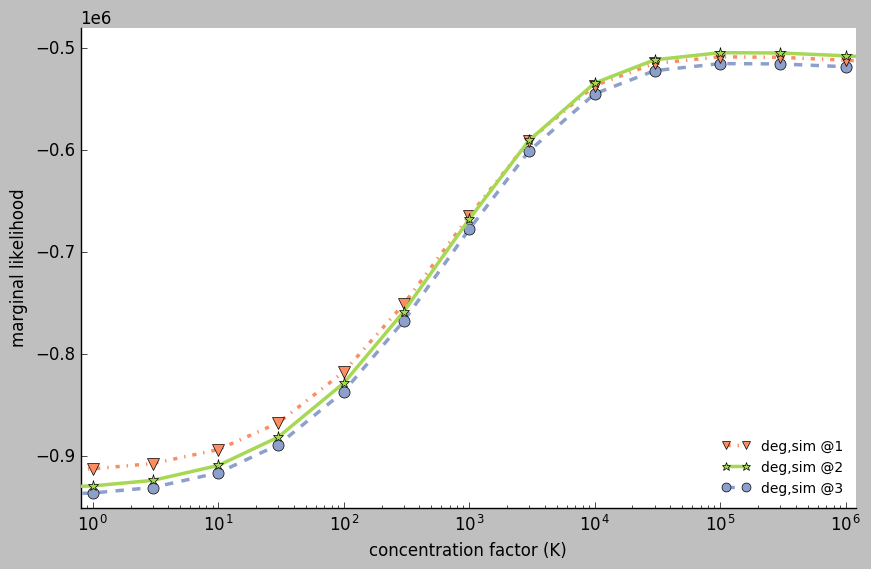

In [117]:
import trails.plot as pl
keys=[
    "deg_cos_at1", 
    "deg_cos_at2", 
    "deg_cos_at3", 
]

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], xlim=[0.8,1200000],
                       notebook=False,  size=size, axis_labels=False, leg=True, leg_loc="lower right", leg_anchor=(1, 0))
fig.savefig("out/wiki-params-links.pdf", bbox_inches='tight')
leg.savefig("out/wiki-params-legend.pdf", bbox_inches='tight')

fig, ax, leg = pl.plot(exp, style=style, keys=keys, ylim=[-9.5 * 10**5, -4.8 * 10**5], 
                       notebook=True, xlim=[0.8,1200000], leg_loc="lower right", leg_anchor=(1, 0))
fig